In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
import matplotlib.pyplot as plt
from random import sample
from folium import TileLayer


In [4]:
data=pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\MSI\AppData\Local\Temp\ipykernel_13384\1965856057.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('NYPD_Complaint_Data_Historic.csv')


In [7]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,25640826H10611,12/05/2006,10:38:00,NaN,(null),NaN,12/05/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO QUEENS NORTH,(null),25-44,WHITE HISPANIC,M
1,16631501H8965,08/25/1973,12:15:00,NaN,(null),NaN,05/29/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO MAN NORTH,(null),45-64,BLACK,F
2,11118212H8714,04/22/2006,16:50:00,NaN,(null),NaN,04/22/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),45-64,BLACK,M
3,23471265H9399,07/20/2006,22:37:00,NaN,(null),NaN,07/20/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN SOUTH,(null),18-24,BLACK,M
4,24565927H10142,04/14/2006,02:37:00,NaN,(null),NaN,04/14/2006,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,(null),NaN,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,(null),45-64,BLACK,M


In [8]:
data.describe()

,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,8.914067e+06,8.914838e+06,8.907245e+06,8.914838e+06,8.914372e+06,8.914372e+06,198045.000000,8.914372e+06,8.914372e+06
mean,6.336865e+01,2.972099e+02,4.124253e+02,6.833533e-01,1.004946e+06,2.072020e+05,13.843293,4.073530e+01,-7.392519e+01
std,3.459529e+01,1.521695e+02,2.181523e+02,6.498413e+00,2.150845e+04,3.035500e+04,12.541970,9.481303e-02,1.128896e-01
min,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,-7.425495e+01
25%,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.916910e+05,1.845420e+05,3.000000,4.067316e+01,-7.397315e+01
50%,6.300000e+01,3.410000e+02,3.610000e+02,0.000000e+00,1.004418e+06,2.062630e+05,11.000000,4.073280e+01,-7.392718e+01
75%,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016866e+06,2.351530e+05,30.000000,4.081211e+01,-7.388222e+01
max,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067306e+06,2.719090e+05,34.000000,4.091296e+01,0.000000e+00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914838 entries, 0 to 8914837
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         object 
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  int64  
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

# DATA CLEANING

In [10]:
for column in data.columns:
    print(column,'have ',(data[column].isna().sum()*100/len(data)),' % missing values')

CMPLNT_NUM have  0.0  % missing values
CMPLNT_FR_DT have  0.007347301207268152  % missing values
CMPLNT_FR_TM have  0.0  % missing values
CMPLNT_TO_DT have  20.403713449419946  % missing values
CMPLNT_TO_TM have  0.0  % missing values
ADDR_PCT_CD have  0.008648502642448467  % missing values
RPT_DT have  0.0  % missing values
KY_CD have  0.0  % missing values
OFNS_DESC have  0.0  % missing values
PD_CD have  0.0851726077355528  % missing values
PD_DESC have  0.0  % missing values
CRM_ATPT_CPTD_CD have  0.0  % missing values
LAW_CAT_CD have  0.0  % missing values
BORO_NM have  0.0  % missing values
LOC_OF_OCCUR_DESC have  0.002624837377863737  % missing values
PREM_TYP_DESC have  0.0  % missing values
JURIS_DESC have  0.0  % missing values
JURISDICTION_CODE have  0.0  % missing values
PARKS_NM have  0.0  % missing values
HADEVELOPT have  0.0  % missing values
HOUSING_PSA have  0.0  % missing values
X_COORD_CD have  0.005227240248224365  % missing values
Y_COORD_CD have  0.005227240248224

Drop columns with many missing values

TRANSIT_DISTRICT and HOUSING_PSA have many null values so we need to drop them

In [11]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [12]:
data.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT'],inplace=True)
data.drop(columns='PATROL_BORO',inplace = True)
data.drop(columns=['KY_CD','RPT_DT','PD_DESC','PD_CD'],inplace=True)

**handling other columns with many nulls**

In [13]:
data.loc[data['PARKS_NM'].notnull(),'PARKS_NM'] = 1
data.loc[data['PARKS_NM'].isna(),'PARKS_NM'] = 0

data.loc[data['HADEVELOPT'].notnull(),'HADEVELOPT'] = 1
data.loc[data['HADEVELOPT'].isna(),'HADEVELOPT'] = 0

data.loc[data['STATION_NAME'].notnull(),'STATION_NAME'] = 1
data.loc[data['STATION_NAME'].isna(),'STATION_NAME'] = 0

data = data.rename({'PARKS_NM':'IN_PARK','HADEVELOPT':'IN_PUBLIC_HOUSING','STATION_NAME':'IN_STATION'}, axis=1)


In [14]:
data.drop(columns=['X_COORD_CD','Y_COORD_CD',"Lat_Lon"],inplace=True)

In [15]:
#we need also to drop rows that don't have coordinates
data = data[data['Latitude'].notna()]
data = data[data['Longitude'].notna()]

In [16]:
if all(data['CMPLNT_FR_DT'].notna() == data['CMPLNT_TO_DT'].notna()):
    data.drop(columns='CMPLNT_TO_DT',inplace = True)

In [17]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,...,IN_PUBLIC_HOUSING,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
8,25636218,12/05/2006,11:38:00,NaN,(null),13.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,...,1,(null),WHITE,M,40.741731,-73.989447,1,(null),UNKNOWN,D
9,23364313,07/12/2006,14:16:00,NaN,(null),79.0,ARSON,COMPLETED,FELONY,BROOKLYN,...,1,(null),(null),(null),40.689592,-73.940805,1,45-64,BLACK,M
10,25523851,11/26/2006,16:00:00,NaN,(null),77.0,ARSON,COMPLETED,FELONY,BROOKLYN,...,1,(null),(null),(null),40.676671,-73.931768,1,18-24,BLACK,F
12,25435616,11/21/2006,02:00:00,NaN,(null),45.0,ROBBERY,ATTEMPTED,FELONY,BRONX,...,1,(null),BLACK,M,40.850992,-73.827426,1,65+,WHITE,M
29,34143267,09/01/2007,09:45:00,NaN,(null),1.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,...,1,(null),BLACK,M,40.707632,-74.011479,1,(null),UNKNOWN,D


In [18]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data['CMPLNT_TO_DT'], errors='coerce')
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


#drop rows when we don't have a date or a time of the incident
data = data[data['CMPLNT_FR_DT'].notna()]
data = data[data['CMPLNT_FR_TM'].notna()]
# new variables
data['year'] = data['CMPLNT_FR_DT'].dt.year
data['month'] = data['CMPLNT_FR_DT'].dt.month
data['day'] = data['CMPLNT_FR_DT'].dt.day
data['hour'] = data['CMPLNT_FR_TM'].dt.hour
# add week day column
data['weekday'] = pd.to_datetime(data['CMPLNT_FR_DT']).dt.day_name()

# we no more need those columns
data.drop(columns='CMPLNT_FR_DT', inplace=True)
data.drop(columns='CMPLNT_FR_TM', inplace=True)
data.drop(columns='CMPLNT_TO_TM', inplace=True)
data.drop(columns='CMPLNT_TO_DT', inplace=True)


C:\Users\MSI\AppData\Local\Temp\ipykernel_13384\4069169548.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
C:\Users\MSI\AppData\Local\Temp\ipykernel_13384\4069169548.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


In [19]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
8,25636218,13.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-73.989447,1,(null),UNKNOWN,D,2006,12,5,11,Tuesday
9,23364313,79.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.940805,1,45-64,BLACK,M,2006,7,12,14,Wednesday
10,25523851,77.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.931768,1,18-24,BLACK,F,2006,11,26,16,Sunday
12,25435616,45.0,ROBBERY,ATTEMPTED,FELONY,BRONX,(null),STREET,N.Y. POLICE DEPT,0,...,-73.827426,1,65+,WHITE,M,2006,11,21,2,Tuesday
29,34143267,1.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-74.011479,1,(null),UNKNOWN,D,2007,9,1,9,Saturday


In [20]:
for i in data.columns:
  print(i,data[i].isnull().sum())

CMPLNT_NUM 0
ADDR_PCT_CD 305
OFNS_DESC 0
CRM_ATPT_CPTD_CD 0
LAW_CAT_CD 0
BORO_NM 0
LOC_OF_OCCUR_DESC 234
PREM_TYP_DESC 0
JURIS_DESC 0
JURISDICTION_CODE 0
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
year 0
month 0
day 0
hour 0
weekday 0


**clean suspect and victim data**

In [21]:
data['SUSP_RACE'] = data['SUSP_RACE'].fillna('UNKNOWN')
data['VIC_RACE'] = data['VIC_RACE'].fillna('UNKNOWN')

data['SUSP_SEX'] = data['SUSP_SEX'].fillna('U')
data['VIC_SEX'] = data['VIC_SEX'].fillna('U')

In [22]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
data.loc[~data['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = 'UNKNOWN'
data.loc[~data['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [23]:
data['BORO_NM'] = data['BORO_NM'].fillna('UNKNOWN')


In [24]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
8,25636218,13.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-73.989447,1,UNKNOWN,UNKNOWN,D,2006,12,5,11,Tuesday
9,23364313,79.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.940805,1,45-64,BLACK,M,2006,7,12,14,Wednesday
10,25523851,77.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.931768,1,18-24,BLACK,F,2006,11,26,16,Sunday
12,25435616,45.0,ROBBERY,ATTEMPTED,FELONY,BRONX,(null),STREET,N.Y. POLICE DEPT,0,...,-73.827426,1,65+,WHITE,M,2006,11,21,2,Tuesday
29,34143267,1.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-74.011479,1,UNKNOWN,UNKNOWN,D,2007,9,1,9,Saturday


In [25]:
data.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

In [26]:
for i in data.columns:
  print(i,data[i].isnull().sum())
print(len(data))

CMPLNT_NUM 0
ADDR_PCT_CD 305
OFNS_DESC 0
CRM_ATPT_CPTD_CD 0
LAW_CAT_CD 0
BORO_NM 0
LOC_OF_OCCUR_DESC 0
PREM_TYP_DESC 0
JURIS_DESC 0
JURISDICTION_CODE 0
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
year 0
month 0
day 0
hour 0
weekday 0
8913497


In [27]:
data.dropna(inplace=True)
len(data)

8913192


**Renaming and clearing data columns**


In [28]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
8,25636218,13.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-73.989447,1,UNKNOWN,UNKNOWN,D,2006,12,5,11,Tuesday
9,23364313,79.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.940805,1,45-64,BLACK,M,2006,7,12,14,Wednesday
10,25523851,77.0,ARSON,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE-HOUSE,OTHER,97,...,-73.931768,1,18-24,BLACK,F,2006,11,26,16,Sunday
12,25435616,45.0,ROBBERY,ATTEMPTED,FELONY,BRONX,(null),STREET,N.Y. POLICE DEPT,0,...,-73.827426,1,65+,WHITE,M,2006,11,21,2,Tuesday
29,34143267,1.0,ROBBERY,COMPLETED,FELONY,MANHATTAN,INSIDE,BANK,N.Y. POLICE DEPT,0,...,-74.011479,1,UNKNOWN,UNKNOWN,D,2007,9,1,9,Saturday


In [29]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC',
       'JURIS_DESC', 'JURISDICTION_CODE', 'IN_PARK', 'IN_PUBLIC_HOUSING',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'IN_STATION', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 'month',
       'day', 'hour', 'weekday'],
      dtype='object')

In [30]:
data.LOC_OF_OCCUR_DESC.value_counts()

LOC_OF_OCCUR_DESC
INSIDE         4564469
FRONT OF       2115003
(null)         1821187
OPPOSITE OF     226075
REAR OF         181906
OUTSIDE           4318
UNKNOWN            234
Name: count, dtype: int64

In [31]:
data.LAW_CAT_CD.value_counts()

LAW_CAT_CD
MISDEMEANOR    4915701
FELONY         2791935
VIOLATION      1205556
Name: count, dtype: int64

In [32]:
data = data.rename({'LAW_CAT_CD':'CRIME_CLASS'},axis = 1)
data = data.rename({'LOC_OF_OCCUR_DESC':'OCCURENCE'},axis = 1)
data = data.rename({'CRM_ATPT_CPTD_CD':'COMPLETED'},axis = 1)

In [33]:
data.OFNS_DESC.value_counts()

OFNS_DESC
PETIT LARCENY                      1556752
HARRASSMENT 2                      1187205
ASSAULT 3 & RELATED OFFENSES        935250
CRIMINAL MISCHIEF & RELATED OF      876534
GRAND LARCENY                       783353
                                    ...   
FORTUNE TELLING                         13
ABORTION                                 7
OFFENSES AGAINST MARRIAGE UNCL           5
UNDER THE INFLUENCE OF DRUGS             3
KIDNAPPING AND RELATED OFFENSES          3
Name: count, Length: 73, dtype: int64

In [34]:
# categorize property related offenses
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD', 
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

# categorize sexual offenses
sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

# categorize drugs/alcohol related offenses
drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']

# categorize personal (assault/homicidal/kidnapping/weapon) offenses
personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'UNLAWFUL POSS. WEAP. ON SCHOOL']

# categorize administrative/trespassing/loitering/traffic offenses
admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS', 
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

# categorize remaining offenses as other
other = ['MISCELLANEOUS PENAL LAW', 'OFFENSES AGAINST MARRIAGE UNCL',
         'OTHER STATE LAWS (NON PENAL LAW)', 'FORTUNE TELLING',
         'NYS LAWS-UNCLASSIFIED VIOLATION', 'LOITERING/GAMBLING (CARDS, DIC',
         'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
         'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
         'NYS LAWS-UNCLASSIFIED FELONY', 'UNAUTHORIZED USE OF A VEHICLE', 'OTHER']


In [35]:
conditions = [
    data['OFNS_DESC'].isin(prop),
    data['OFNS_DESC'].isin(sexual),
    data['OFNS_DESC'].isin(drug_alch),
    data['OFNS_DESC'].isin(personal),
    data['OFNS_DESC'].isin(admin)
]

categories = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']

# Use np.select to create the 'OFNS_CATS' column
data['OFNS_DESC'] = np.select(conditions, categories, default='OTHER')

In [36]:
data['OFNS_DESC'].unique()

array(['PROPERTY', 'SEXUAL', 'PERSONAL', 'DRUGS/ALCOHOL', 'OTHER',
       'ADMINISTRATIVE'], dtype=object)

In [37]:

column_titles = ['CMPLNT_NUM','year','month', 'day','weekday','hour','Latitude', 'Longitude', 'COMPLETED',
                 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC','OCCURENCE','JURIS_DESC', 'JURISDICTION_CODE',
                 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
                 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
data = data.reindex(columns = column_titles)

In [38]:
data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
8,25636218,2006,12,5,Tuesday,11,40.741731,-73.989447,COMPLETED,PROPERTY,...,0,1,1,1,UNKNOWN,WHITE,M,UNKNOWN,UNKNOWN,D
9,23364313,2006,7,12,Wednesday,14,40.689592,-73.940805,COMPLETED,PROPERTY,...,97,1,1,1,UNKNOWN,(null),(null),45-64,BLACK,M
10,25523851,2006,11,26,Sunday,16,40.676671,-73.931768,COMPLETED,PROPERTY,...,97,1,1,1,UNKNOWN,(null),(null),18-24,BLACK,F
12,25435616,2006,11,21,Tuesday,2,40.850992,-73.827426,ATTEMPTED,PROPERTY,...,0,1,1,1,UNKNOWN,BLACK,M,65+,WHITE,M
29,34143267,2007,9,1,Saturday,9,40.707632,-74.011479,COMPLETED,PROPERTY,...,0,1,1,1,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D


# Exploratory Data Analysis

**Victims Plots**


C:\Users\MSI\AppData\Local\Temp\ipykernel_13384\3930303507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);


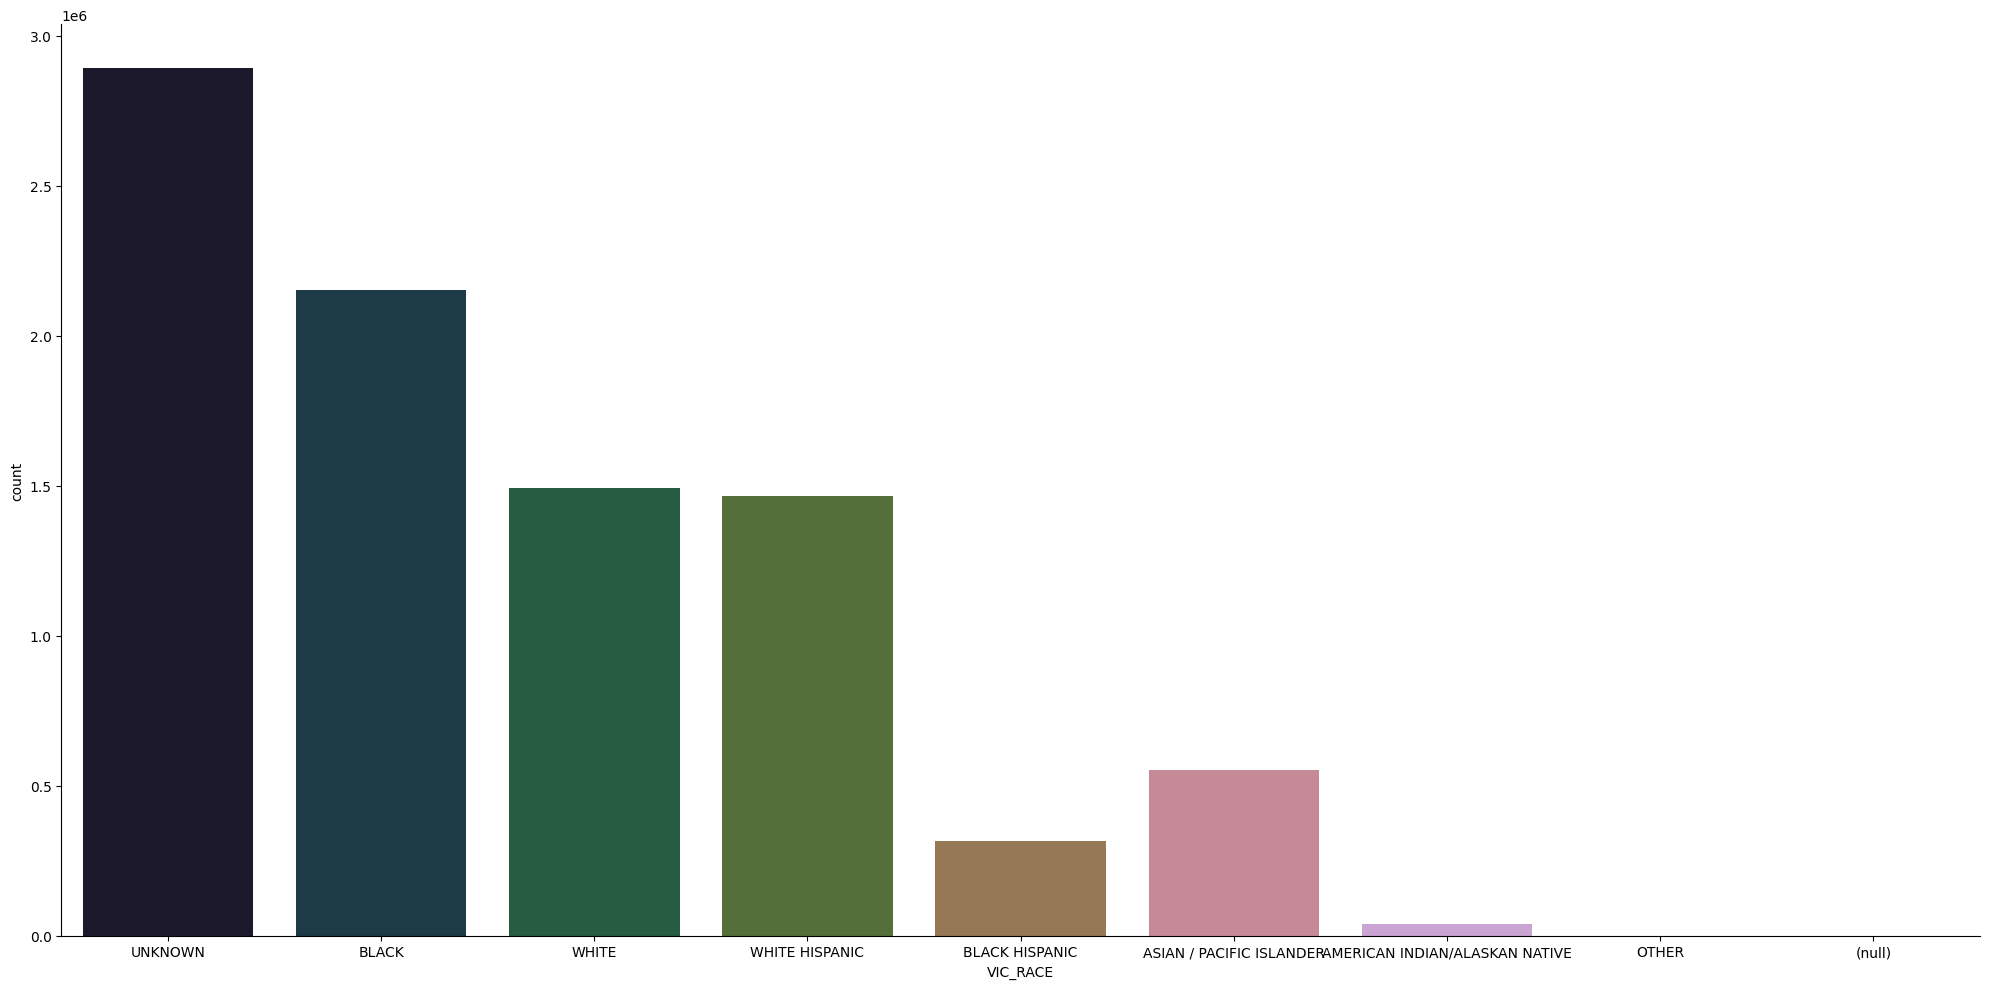

In [39]:
#Number of victims by race

sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);

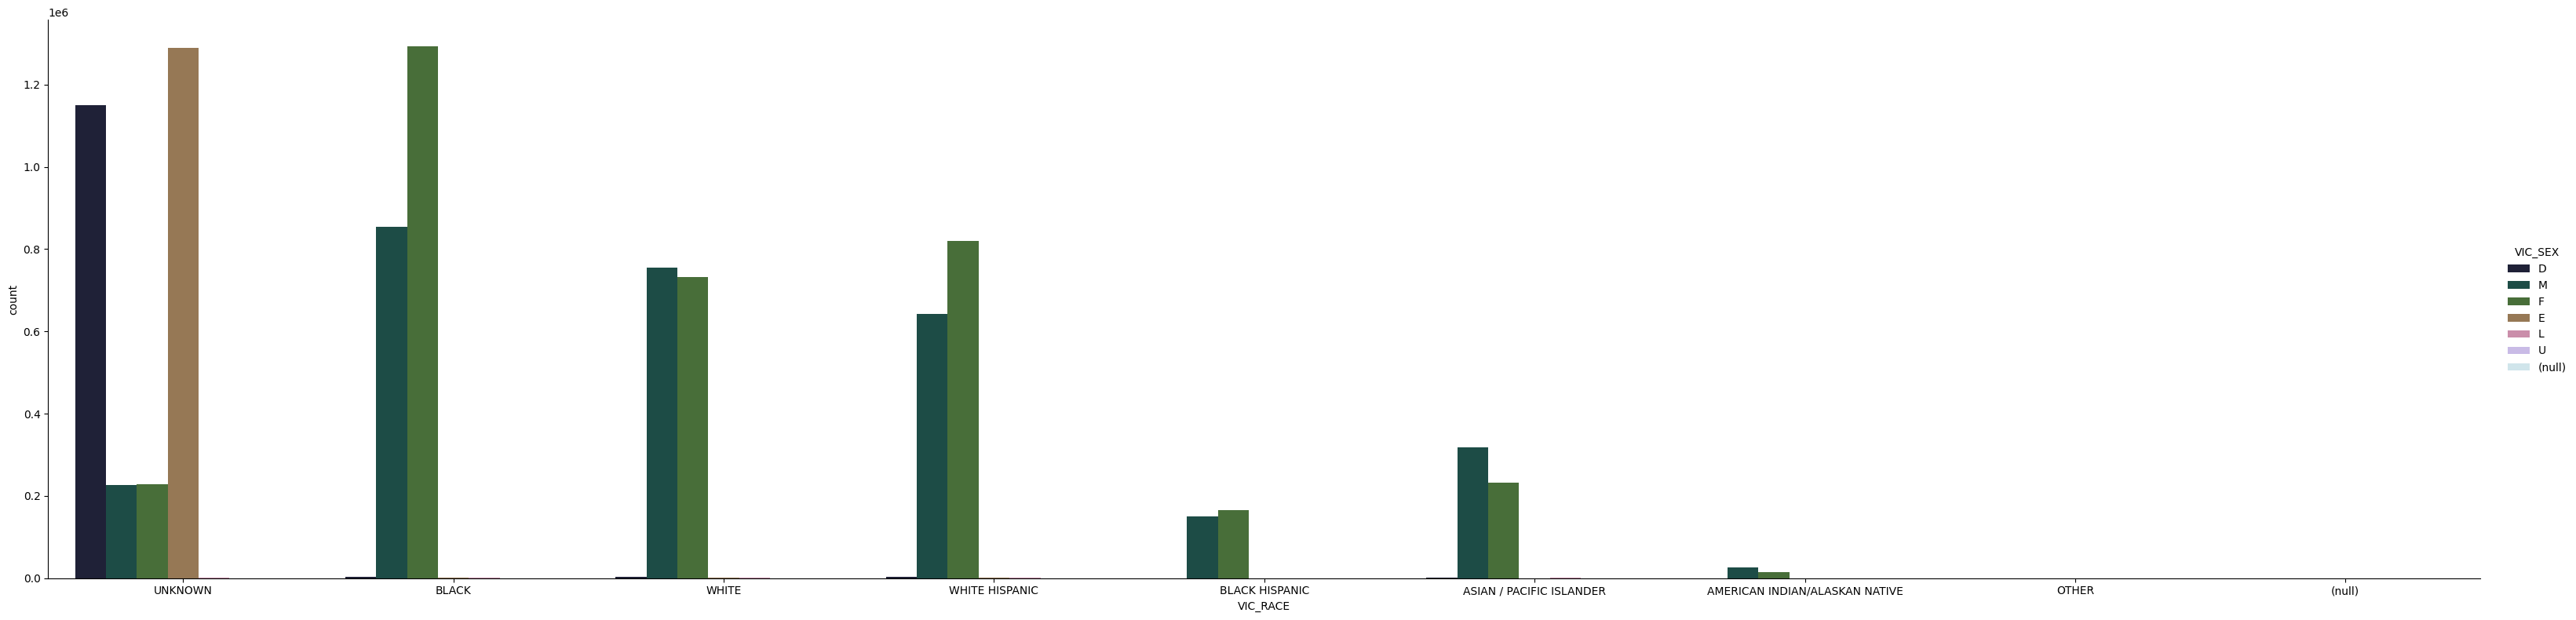

In [40]:
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=data, height=8, aspect=4)


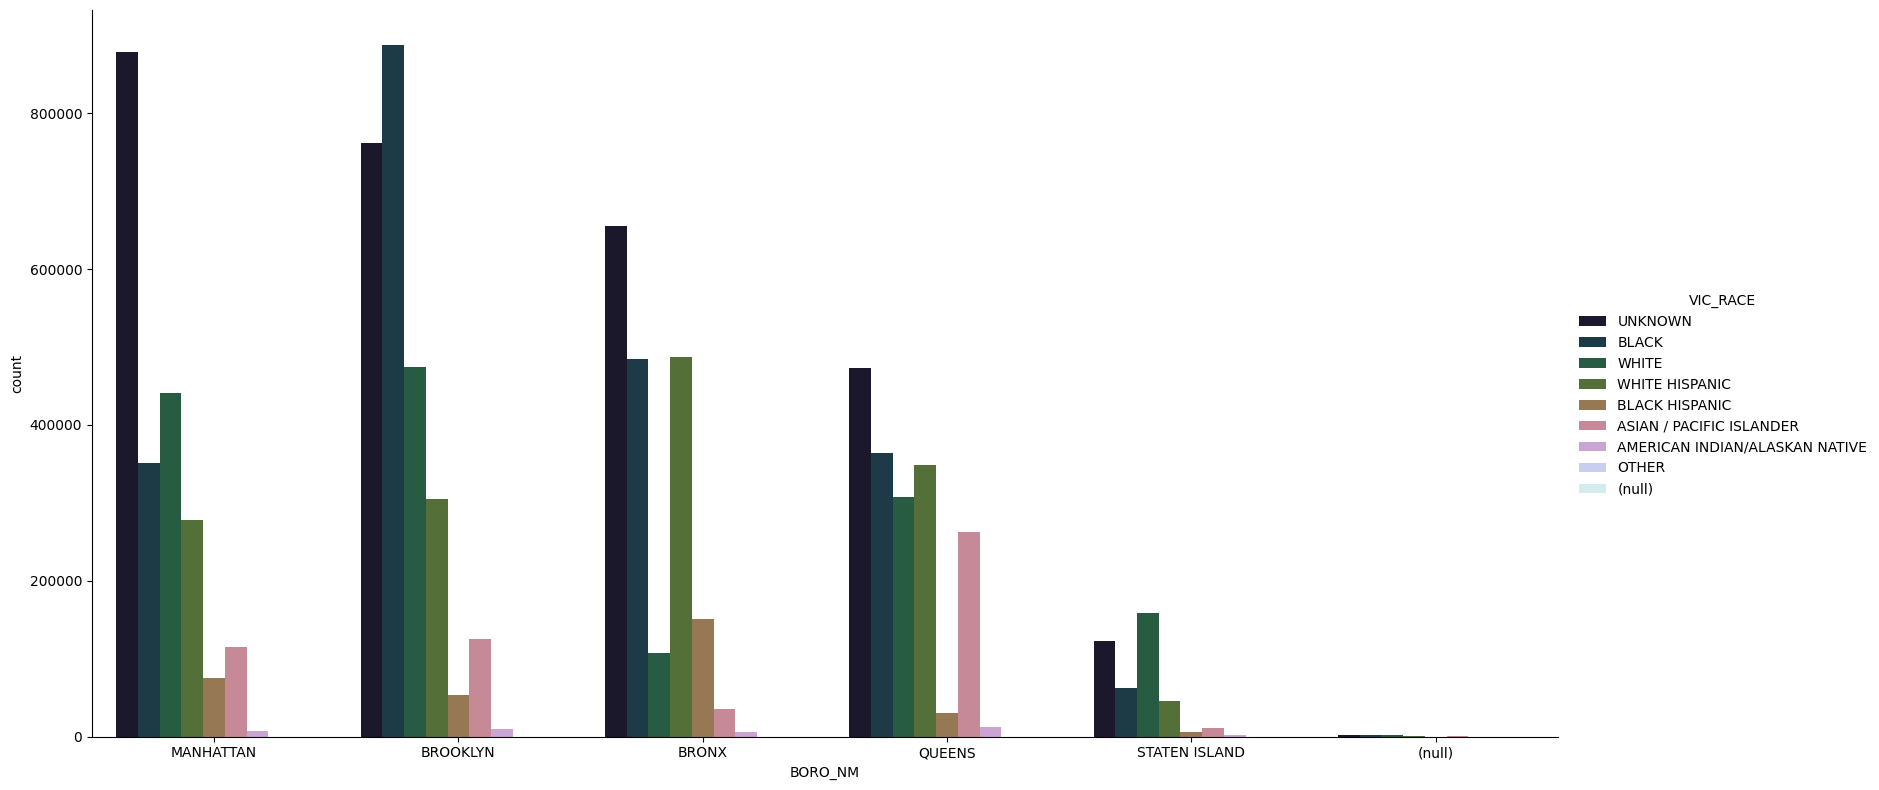

In [41]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=data, height=8, aspect = 2)


**Suspects PLots**

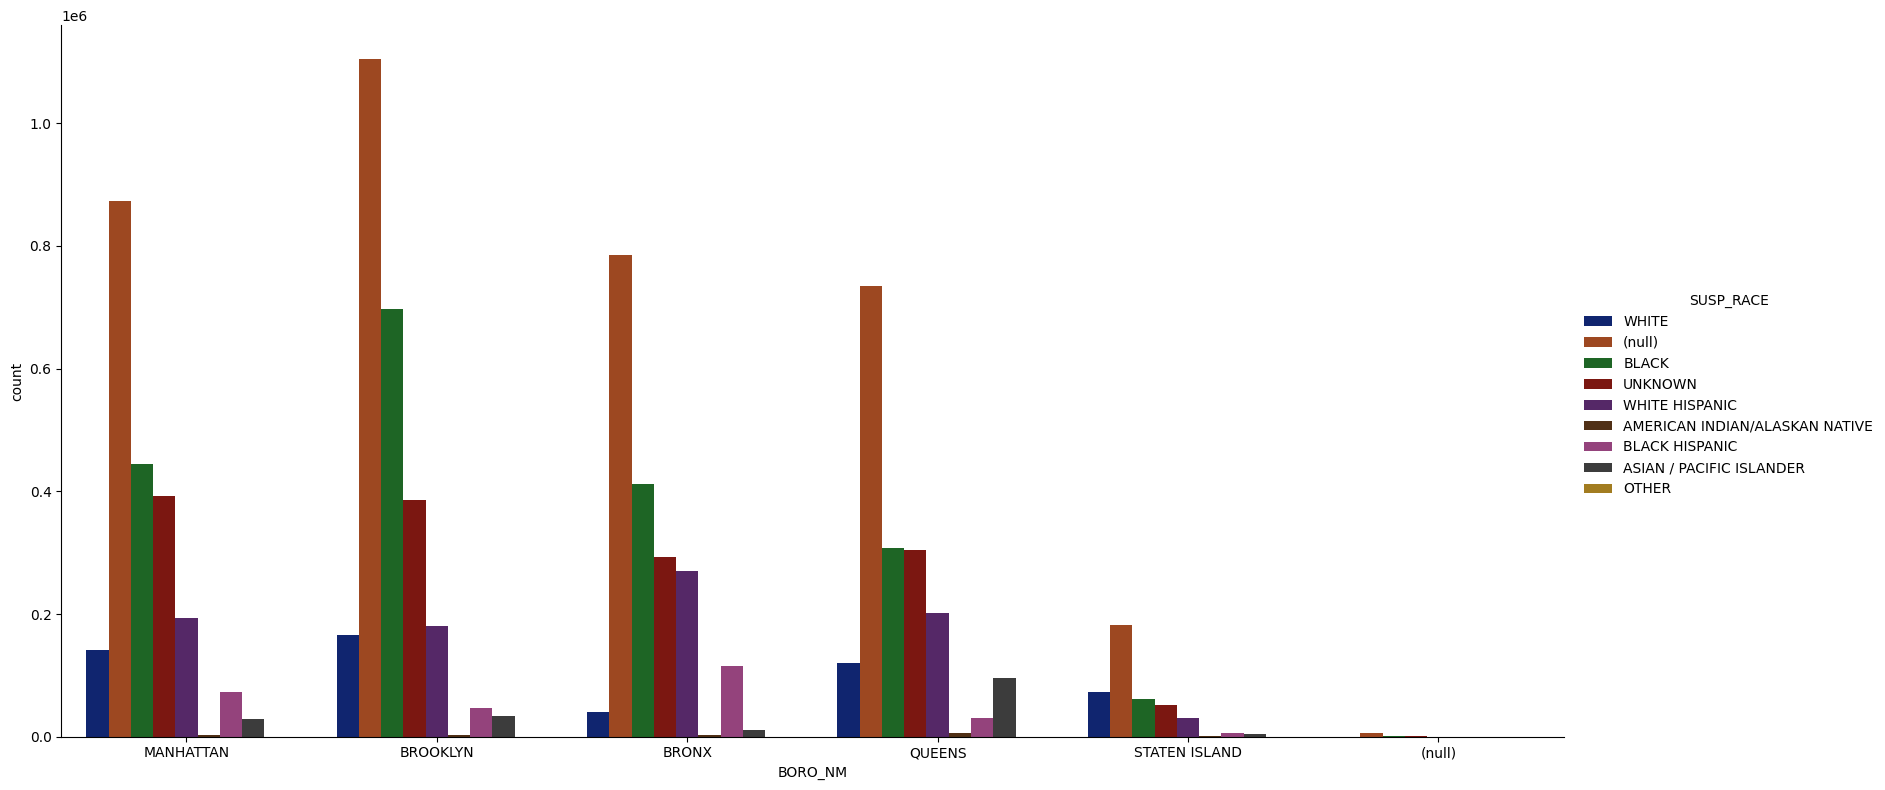

In [42]:
#Number of Suspects by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",palette="dark", data=data, height=8, aspect = 2)


<Figure size 1600x800 with 0 Axes>

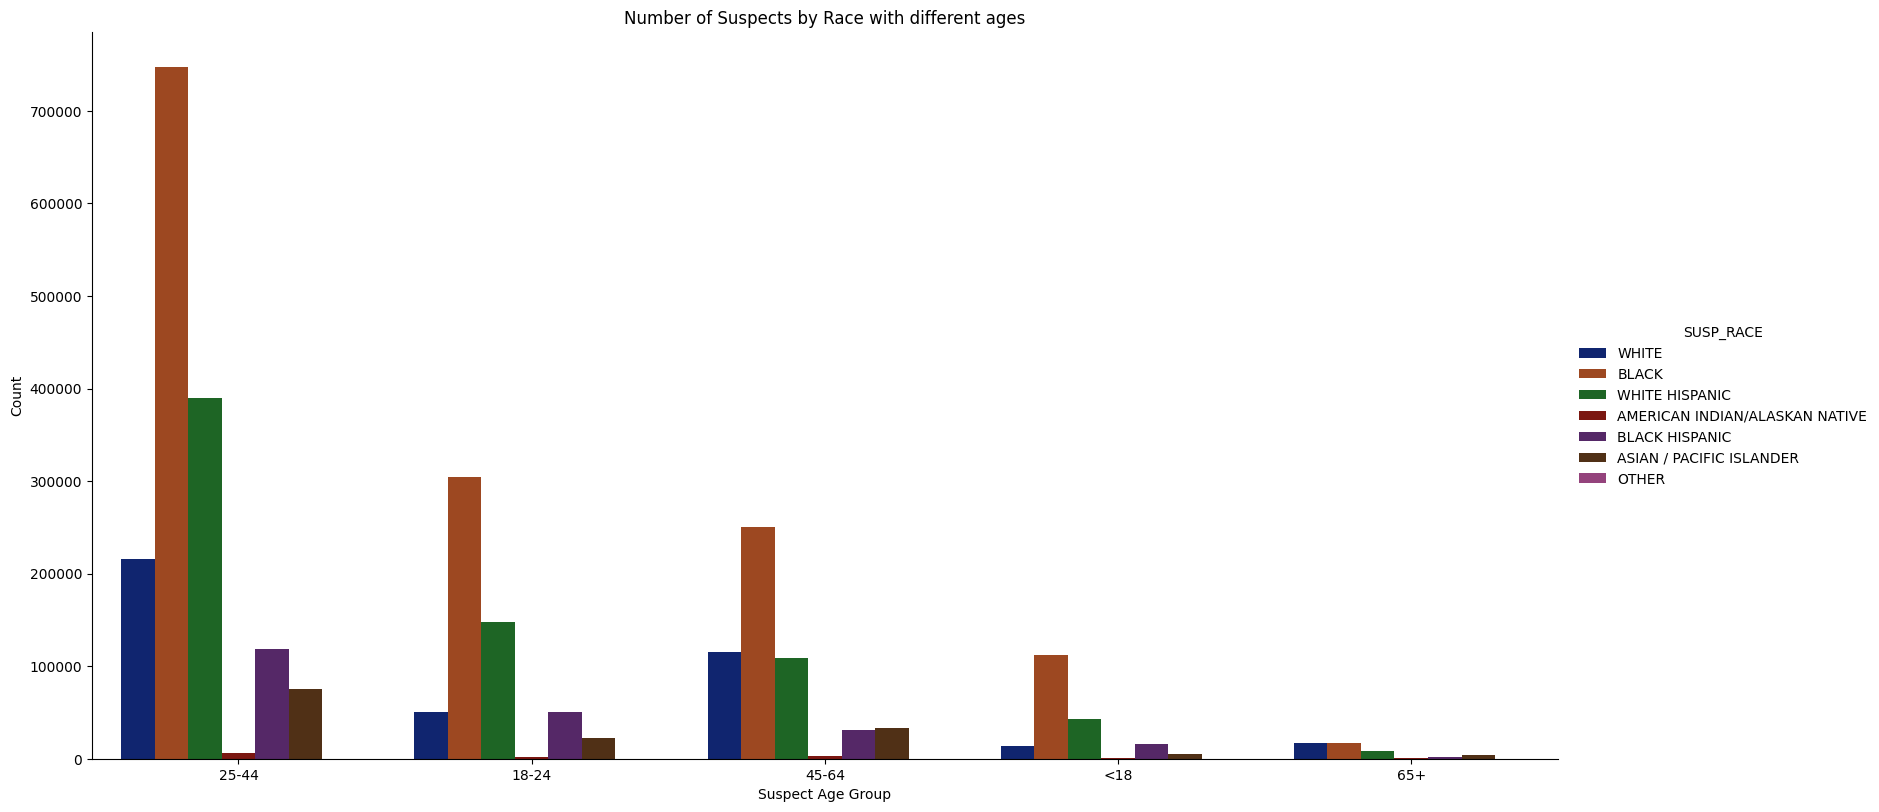

In [43]:
# Filter out rows with SUSP_AGE_GROUP == 'UNKNOWN' or SUSP_RACE == 'UNKNOWN'
filtered_data = data[(data['SUSP_AGE_GROUP'] != 'UNKNOWN') & (data['SUSP_RACE'] != 'UNKNOWN')]

# Number of suspects by Race in the different boroughs
plt.figure(figsize=(16, 8))
ax = sns.catplot(x="SUSP_AGE_GROUP", hue="SUSP_RACE", kind="count", palette="dark", data=filtered_data, height=8, aspect=2)

# Set plot labels and title
ax.set_axis_labels("Suspect Age Group", "Count")
ax.set(title="Number of Suspects by Race with different ages")

# Show the plot
plt.show()


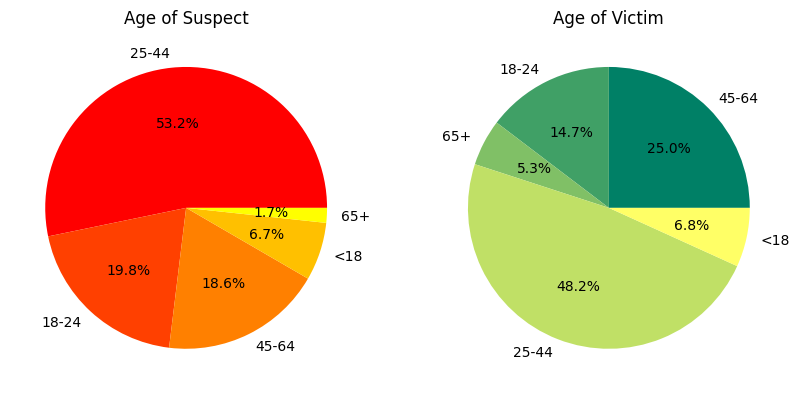

In [44]:
filtered_data_susp = data[data['SUSP_AGE_GROUP'] != 'UNKNOWN']
filtered_data_vic = data[data['VIC_AGE_GROUP'] != 'UNKNOWN']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Age of suspect
filtered_data_susp['SUSP_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Suspect',
                                                                   colormap='autumn', autopct='%1.1f%%', ylabel='', ax=axs[0])

# Plot for Age of victim
filtered_data_vic['VIC_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Victim',
                                                                 colormap='summer', autopct='%1.1f%%', ylabel='', ax=axs[1])

plt.show()

**Crimes Plots**

Text(0.5, 1.0, 'crime success rate')

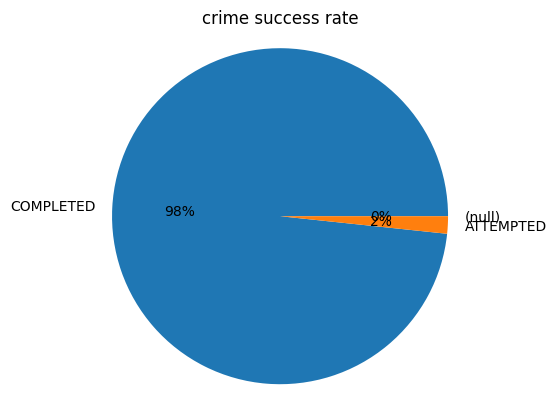

In [45]:
# Successful crime rate
plt.pie(data['COMPLETED'].value_counts(normalize=True).round(4),labels=data['COMPLETED'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

array([<Axes: ylabel='count'>], dtype=object)

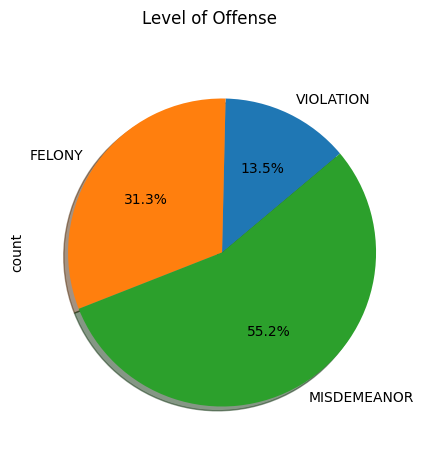

In [46]:
data['CRIME_CLASS'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

C:\Users\MSI\AppData\Local\Temp\ipykernel_13384\3863479351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")


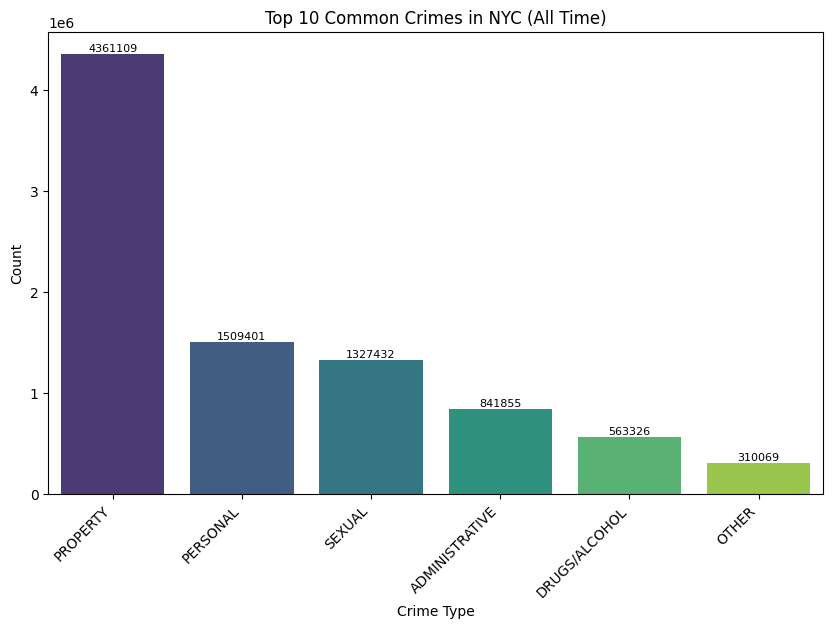

In [47]:
# Get the top 10 common crimes
top_crimes = data['OFNS_DESC'].value_counts()[:10]

# Plotting with Seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Common Crimes in NYC (All Time)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding count values on top of each bar
for i, value in enumerate(top_crimes.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

**Locations of the Occurred Crimes**

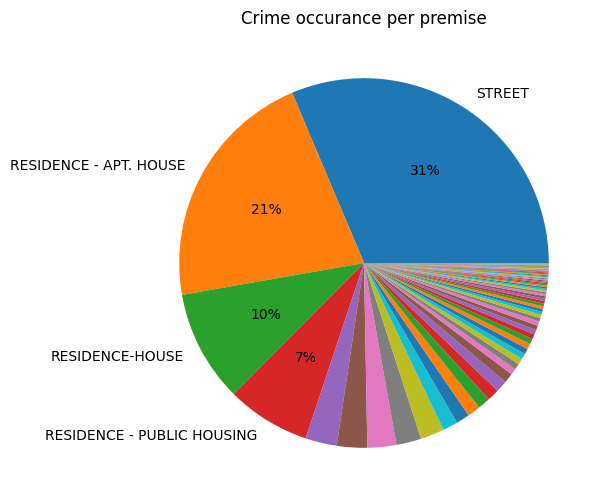

In [48]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=data['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

**HEATMAP FROM NYC**

In [49]:
#Creation of Heatmap

# Combine Latitude and Longitude into positions
positions = list(zip(data['Latitude'], data['Longitude']))

# Choose the map tiles (e.g., 'Stamen Terrain')
tiles = 'Stamen Terrain'

# Create a Folium Map with attribution
heatmap_map = folium.Map(
    location=[40.75, -73.98],
    zoom_start=10,
    control_scale=True  # This adds a scale to the map
)

# Add a base map layer
TileLayer(tiles=tiles, attr="Map data © Stamen Design, OpenStreetMap contributors").add_to(heatmap_map)

# Sample a subset of positions (e.g., 22,000 points)
sampled_positions = sample(positions, 22000)

# Add HeatMap layer to the Folium Map
HeatMap(sampled_positions, radius=8).add_to(heatmap_map)

# Display the Folium Map
heatmap_map

**WHEN the incidents had happened**

Text(0.5, 1.0, 'Crimes per month')

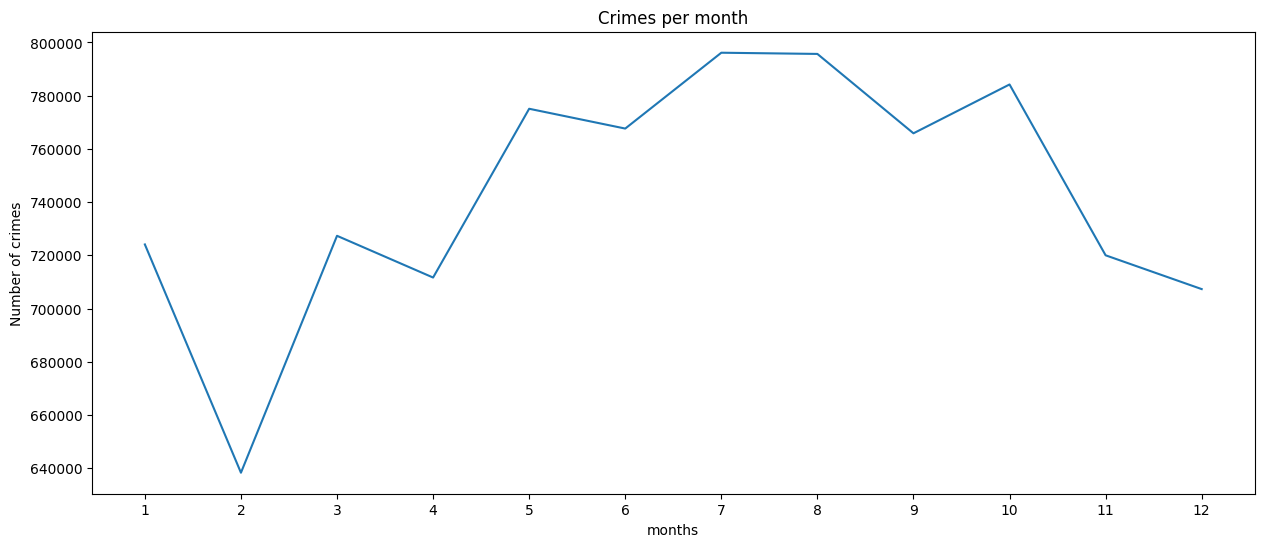

In [50]:
# Crime distribution per month
fig= plt.figure(figsize=(15,6))
data.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

Text(0.5, 1.0, 'Crimes per week days')

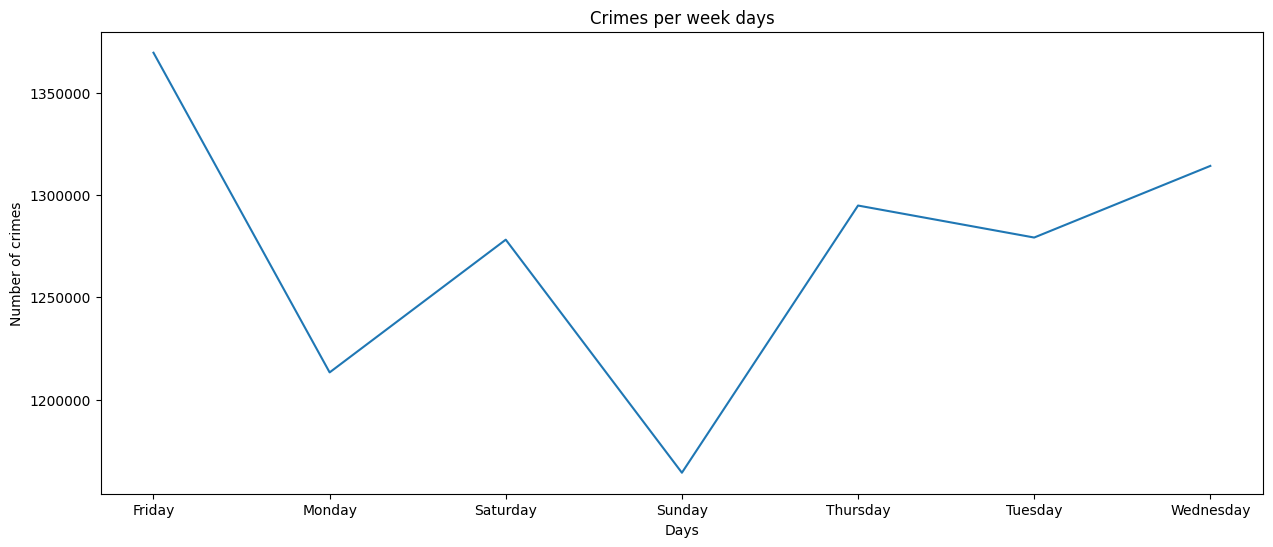

In [51]:
# Crime distribution per week days
fig= plt.figure(figsize=(15,6))
data.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

Text(0.5, 1.0, 'Crimes per hour')

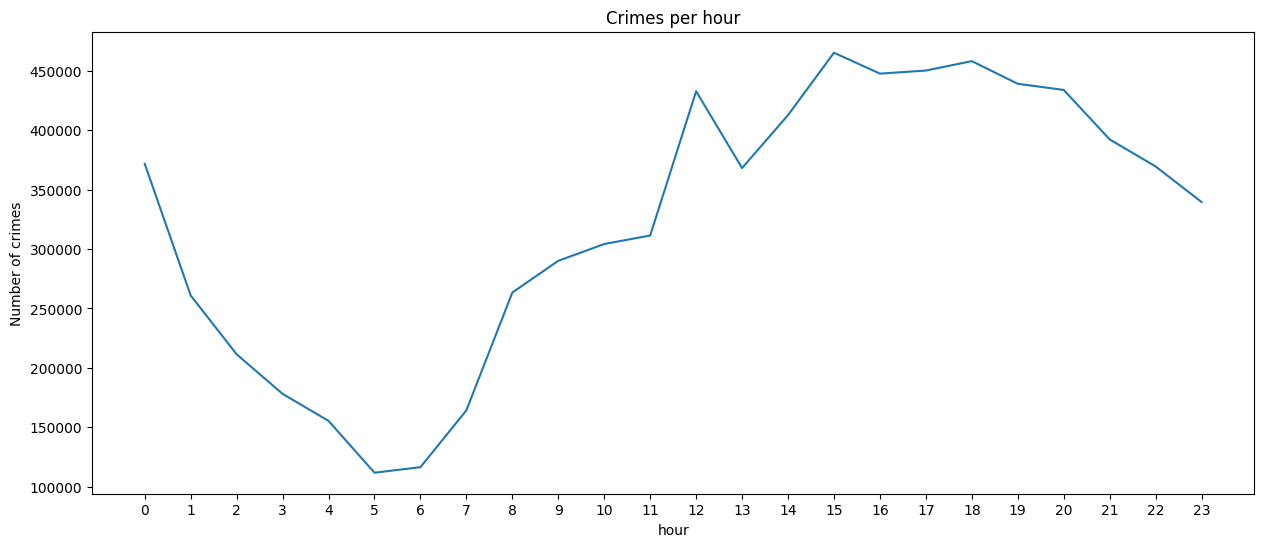

In [92]:
# Crime distribution per hour
fig= plt.figure(figsize=(15,6))
data.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

**Crimes evolution in last years**

Text(0.5, 1.0, 'Crime evolution')

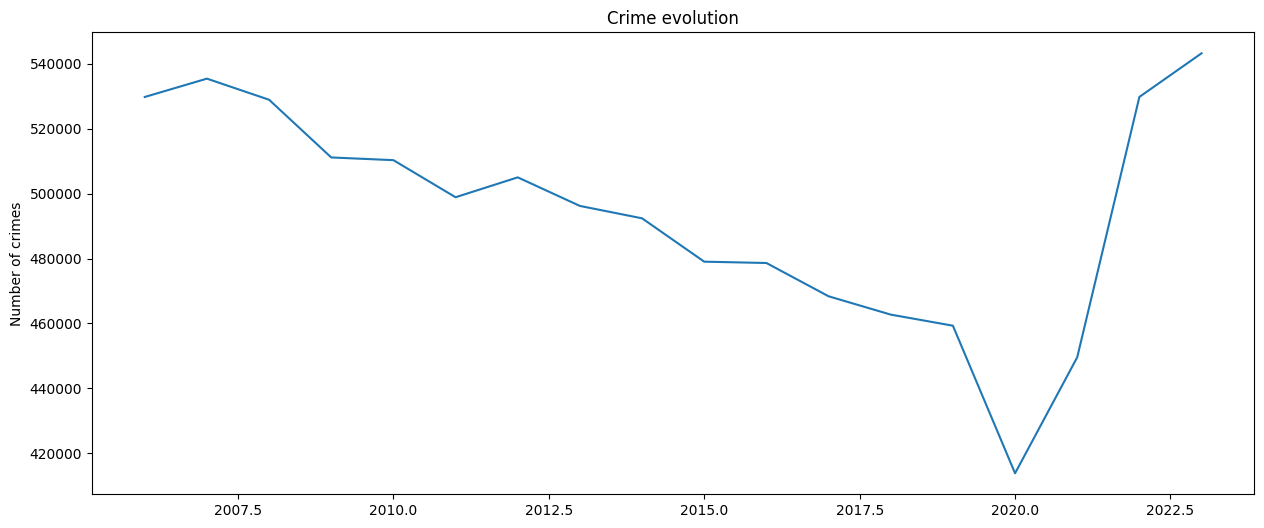

In [52]:
# Crime distribution per year
fig= plt.figure(figsize=(15,6))
temp_df = data[data["year"]>2005]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution')

****Reducing Memory usage****

In [53]:
def convert_object_to_category(df):
    for column in df.select_dtypes(include='object').columns:
        df[column] = df[column].astype('category')
    return df

data = convert_object_to_category(data)


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8913192 entries, 8 to 8914837
Data columns (total 26 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CMPLNT_NUM         category
 1   year               int32   
 2   month              int32   
 3   day                int32   
 4   weekday            category
 5   hour               int32   
 6   Latitude           float64 
 7   Longitude          float64 
 8   COMPLETED          category
 9   OFNS_DESC          category
 10  ADDR_PCT_CD        float64 
 11  CRIME_CLASS        category
 12  BORO_NM            category
 13  PREM_TYP_DESC      category
 14  OCCURENCE          category
 15  JURIS_DESC         category
 16  JURISDICTION_CODE  int64   
 17  IN_PARK            category
 18  IN_PUBLIC_HOUSING  category
 19  IN_STATION         category
 20  SUSP_AGE_GROUP     category
 21  SUSP_RACE          category
 22  SUSP_SEX           category
 23  VIC_AGE_GROUP      category
 24  VIC_RACE           category
 

In [55]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
data = reduce_mem_usage(data)

Memory usage after optimization is: 980.52 MB
Memory usage after optimization is: 674.51 MB
Decreased by 31.2%


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8913192 entries, 8 to 8914837
Data columns (total 26 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CMPLNT_NUM         category
 1   year               int16   
 2   month              int8    
 3   day                int8    
 4   weekday            category
 5   hour               int8    
 6   Latitude           float16 
 7   Longitude          float16 
 8   COMPLETED          category
 9   OFNS_DESC          category
 10  ADDR_PCT_CD        float16 
 11  CRIME_CLASS        category
 12  BORO_NM            category
 13  PREM_TYP_DESC      category
 14  OCCURENCE          category
 15  JURIS_DESC         category
 16  JURISDICTION_CODE  int8    
 17  IN_PARK            category
 18  IN_PUBLIC_HOUSING  category
 19  IN_STATION         category
 20  SUSP_AGE_GROUP     category
 21  SUSP_RACE          category
 22  SUSP_SEX           category
 23  VIC_AGE_GROUP      category
 24  VIC_RACE           category
 

**Saving Dataframe**

In [57]:
data.to_csv('final_data.csv', index=False)
